https://docs.google.com/document/d/1JeGIkXKxqZwfo_ViF9-qEaKky4hfjy7qpSF1YJVJ_qQ/edit

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("dataset2.csv")

df

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
...,...,...,...,...
9995,M,68,1.999051,135.605141
9996,female,33,1.601821,141.973080
9997,M,25,1.926656,131.105269
9998,F,32,1.844436,62.475271


Item a) A parte de baixo do gráfico parece apresentar uma correlação linear entre as variáveis, porém, parecem existir dados incorretos ou outliers pela enorme dispersão na parte de cima do gráfico com pesos muito desproporcionais à altura (de maneira geral)

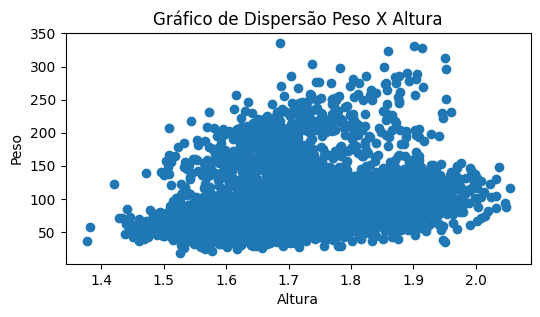

In [19]:
# Criar o gráfico de dispersão
plt.figure(figsize=(6, 3))
plt.scatter(df['height'], df['weight'])

# Definir rótulos e título
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Gráfico de Dispersão Peso X Altura')

# Exibir o gráfico
plt.show()

Item b) A coluna de sexo possui imputs por extenso e apenas a sigla

In [20]:
print(df["sex"].unique())

df['sex'] = df['sex'].replace('female', 'F')
df['sex'] = df['sex'].replace('male', 'M')

print(df["sex"].unique())

['M' 'F' 'male' 'female']
['M' 'F']


Item c)

In [21]:
df["IMC"] = df["weight"]/(df["height"]**2)

df["IMC"]

0       32.569938
1       27.174950
2       18.401889
3       38.169932
4       25.235778
          ...    
9995    33.933486
9996    55.332206
9997    35.319260
9998    18.364586
9999    35.581941
Name: IMC, Length: 10000, dtype: float64

Item d) Outliers univariados são aqueles que fogem muito do padrão em relação aos outros dados quando se observa apenas uma característica, por exemplo uma pessoa muito mais alta que as outras. Já os outliers multivariados se afastam do padrão quando analizamos as características como um conjunto, por exemplo no caso do IMC, que é um parâmetro que relaciona peso e altura. Por isso, escolhi remover os dados que fugissem muito dos limites padrões do IMC, 5 a mais ou a menos dos valores tabelados.

In [22]:
print("mínimo",(df["IMC"].min()))
print("máximo",(df["IMC"].max()))

# Remover linhas com valores de IMC menores que 15 ou maiores que 45
df = df.drop(df[(df['IMC'] < 15) | (df['IMC'] > 45)].index)

print("mínimo",(df["IMC"].min()))
print("máximo",(df["IMC"].max()))

mínimo 7.715833279464494
máximo 117.99057469469851
mínimo 15.000874451577202
máximo 44.90143185949151


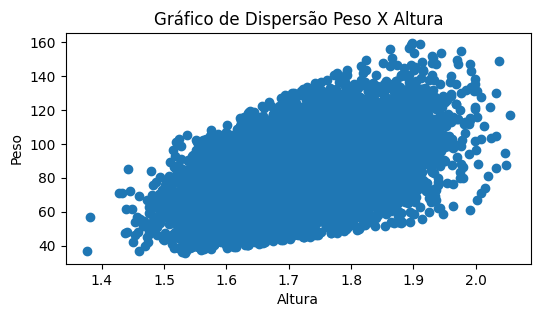

In [23]:
# Criar o gráfico de dispersão
plt.figure(figsize=(6, 3))
plt.scatter(df['height'], df['weight'])

# Definir rótulos e título
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Gráfico de Dispersão Peso X Altura')

# Exibir o gráfico
plt.show()

Item e)

In [24]:
total_linhas = len(df)
linhas_fora_intervalo = len(df[(df['IMC'] < 18.5) | (df['IMC'] > 24.9)])
porcentagem_fora_intervalo = (linhas_fora_intervalo / total_linhas) * 100

print(f"A porcentagem de observações com IMC fora do intervalo 18.5-24.9 é: {porcentagem_fora_intervalo:.2f}%")

A porcentagem de observações com IMC fora do intervalo 18.5-24.9 é: 75.81%


Item f) De maneira geral, os homens são mais altos que as mulheres mas também apresentam maior peso. Ou seja, espera-se que, em média, o IMC dos homens e das mulheres sejam similares, sigam a mesma distribuição dentro do grupo de pessoas contempladas pelo DataSet

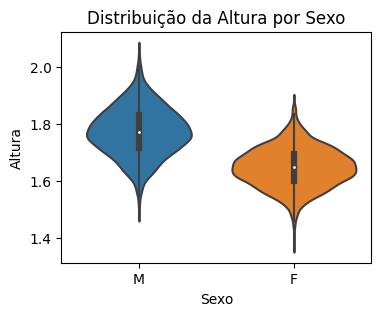

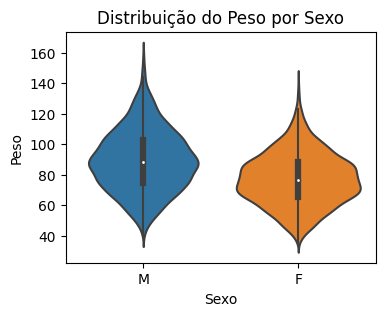

In [25]:
# Traçar gráfico de violino da altura em função do sexo
plt.figure(figsize=(4, 3))
sns.violinplot(x='sex', y='height', data=df)
plt.xlabel('Sexo')
plt.ylabel('Altura')
plt.title('Distribuição da Altura por Sexo')
plt.show()

# Traçar gráfico de violino do peso em função do sexo
plt.figure(figsize=(4, 3))
sns.violinplot(x='sex', y='weight', data=df)
plt.xlabel('Sexo')
plt.ylabel('Peso')
plt.title('Distribuição do Peso por Sexo')
plt.show()